# KIWI DS Assignment

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from functions import *
from sklearn.metrics import roc_curve, auc

warnings.filterwarnings('ignore')

path_it = 'C:\\Users\\pacak\\Desktop\\kiwi_DS\\itineraries.csv'
path_seg =  'C:\\Users\\pacak\\Desktop\\kiwi_DS\\segments.csv'

In [2]:
data_it = pd.read_csv(path_it)
data_seg = pd.read_csv(path_seg)

## Columns description

* content type - vi means virtually interlined, airlines do not cooperate together
* is_hold_bags_disabled - whether it is possible to buy luggage (true = it is not possible)
* base fare - original price from airlines
* fare category - M -economy class, W - premium category, C - business, F - first

# Data preprocessing
- computing of features that will be consequently used in the modelling

## List of created features and their names

#### Categorical:
* content_type : Whether itinerarty is virtually interlined or not
* partner: Partner, only 10 most frequent categories are used, rest is concated to 'other group'
* trip_type: One way, Round trip, multicity or nomad
* market: Market, only 10 most frequent categories are used, rest is concated to 'other group'

#### Numerical:
* passengers: number of passengers in itinerary
* base_fare: base fare of itinerary
* is_hold_bags_disabled: whether hold baggage is dissabled or not
* search_flight_diff_first: Time difference between day of search and first departure time in itinerary
* search_flight_diff_last:  Time difference between day of search and last arrival time in itinerary
* airline_nunique: Number of unique airlines in itinerary
* dayweek_of_first_flight: Dayweek of first flight in itinerary
* month_of_first_flight: Month of first flight in itinerary
* sector_max: Number of sectors in itinerary
* vehicle_type_nunique: type of vehicle (1 = only airplane was used, >1 means even train or bus was used)
* fare_category_nunique: type of fare(1 = only economy class was used, >1 means even higher classes were used)
* time_in_air_min (min, max, sum, mean): Statistics about differences between departure and arrival times
* number_of_flights_within_sector (min, max) : Statistics of number of flights within each sector
* airline_XX_sum : number of flights with XX airline in itinerary
* dayweek_of_search: Dayweek of search
* month_of_search: Month of search
* hour_of_search: Hour of search

- train/valid/test split

In [3]:
train, valid, test, y_train, y_valid, y_test, numerical_preds, categorical_preds = preprocess_data(data_it, data_seg)

# Target visualisation

- standard and flexi are merged to category 1
- saver is category 0

0    0.932808
1    0.067192
Name: fare_type, dtype: float64

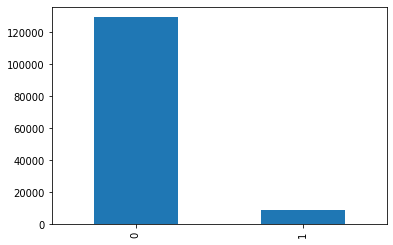

In [4]:
y_train.value_counts(dropna=False).plot(kind='bar')
y_train.value_counts(dropna=False)/train.shape[0]

# Explanatory data analysis of categorical variables

Odds_ratio means log2 of ratio of target rate within given category and total target rate of dataset. For Example, when target rate in dataset is 0.05 and target rate within particular category is 0.1, than odds_ratio = log2(0.1/0.05)=1.

content_type


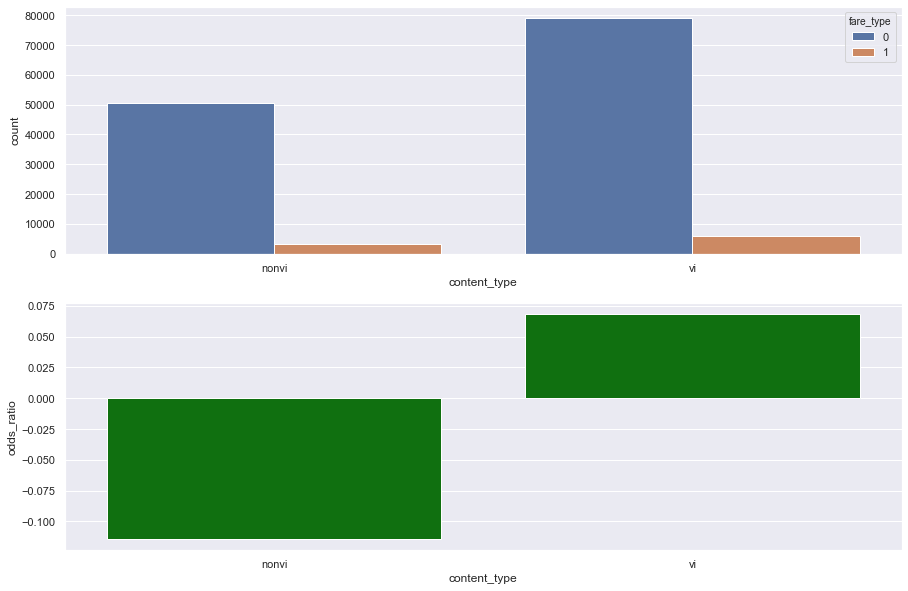

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
partner


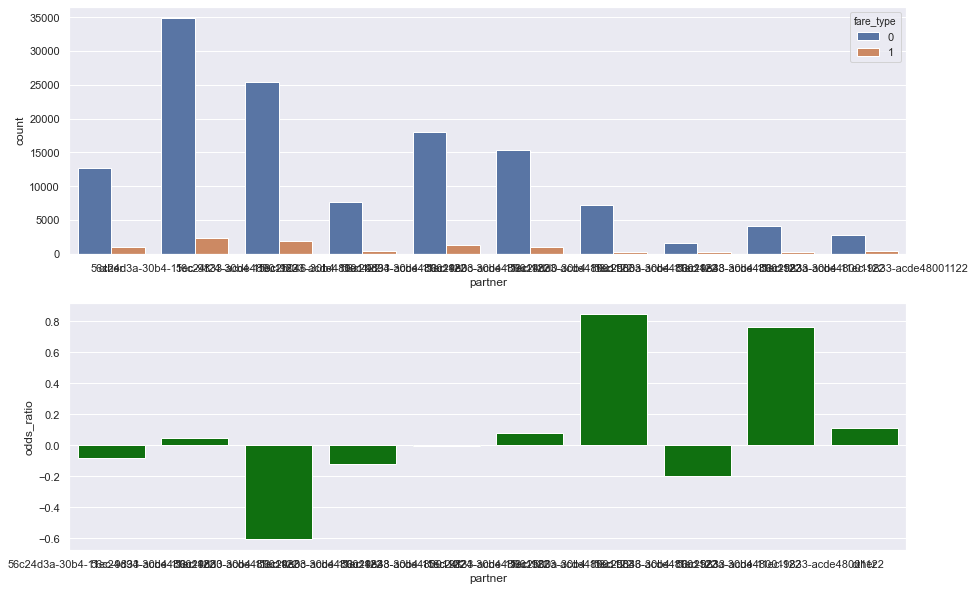

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
trip_type


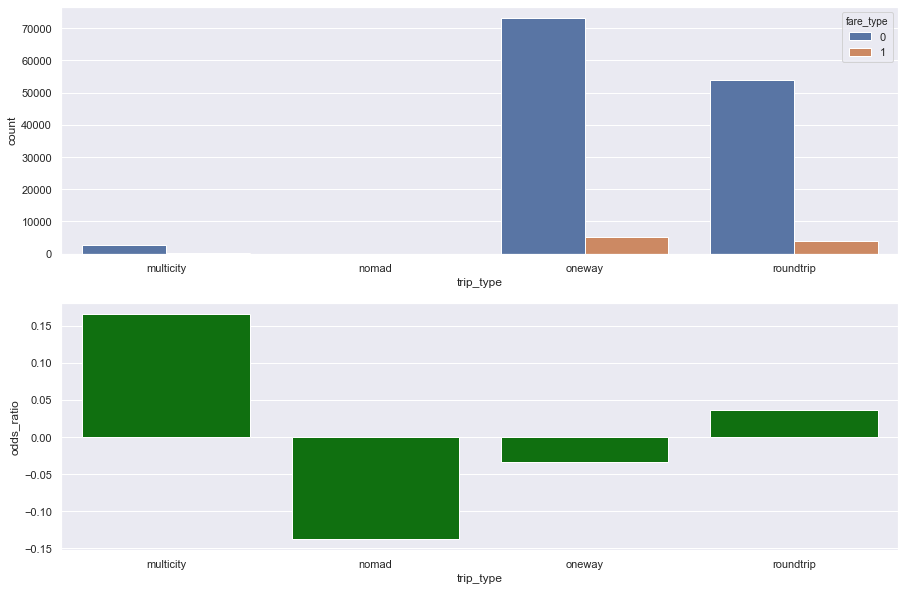

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
market


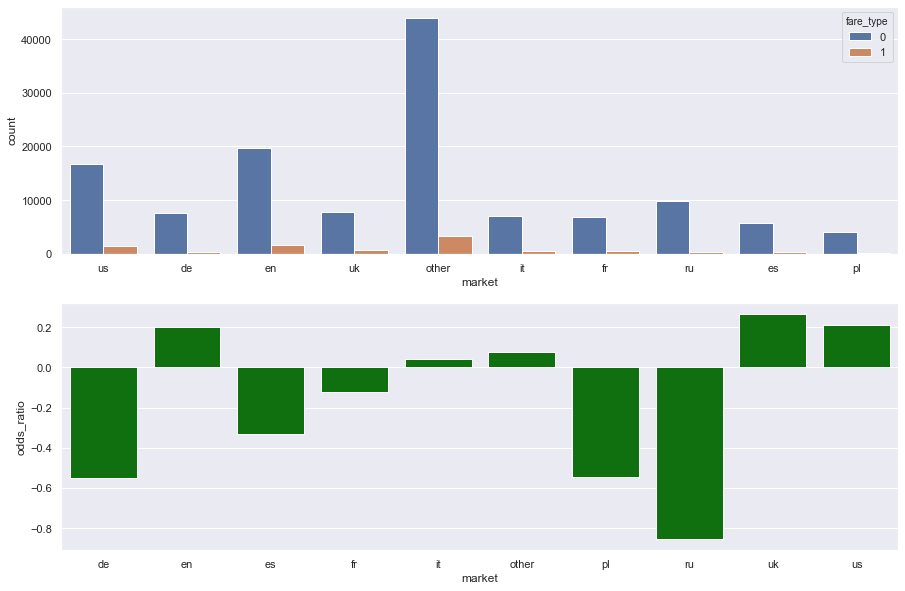

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------


In [5]:
for col in categorical_preds:
    print(col)
    graph_exploration(train[col], y_train)
    
    print('--------------------------------------------------------------------------------------------------------------')
    print('--------------------------------------------------------------------------------------------------------------')

#### Findings:
* Most usefull feature seems to be market - ru, pl and de are more likely to have targeet 0.
* Content type and trip_type seems to be not very powerful.

# Explanatory data analysis of numerical variables


passengers
SAME FREQUENCY BINNING:


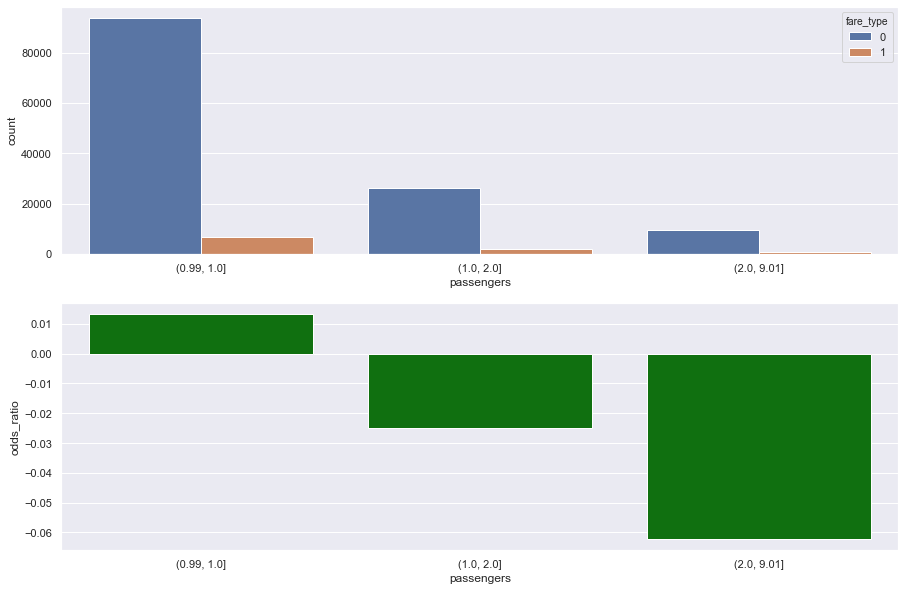

AUC of this variable:
0.504
---------------------------------------------------------
---------------------------------------------------------
base_fare
SAME FREQUENCY BINNING:


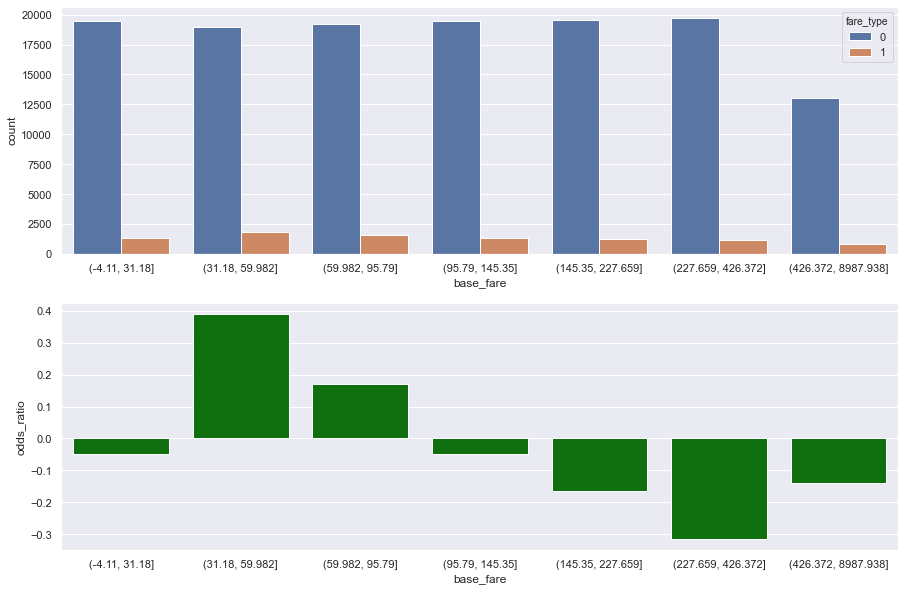

AUC of this variable:
0.532
---------------------------------------------------------
---------------------------------------------------------
is_hold_bags_disabled
SAME FREQUENCY BINNING:


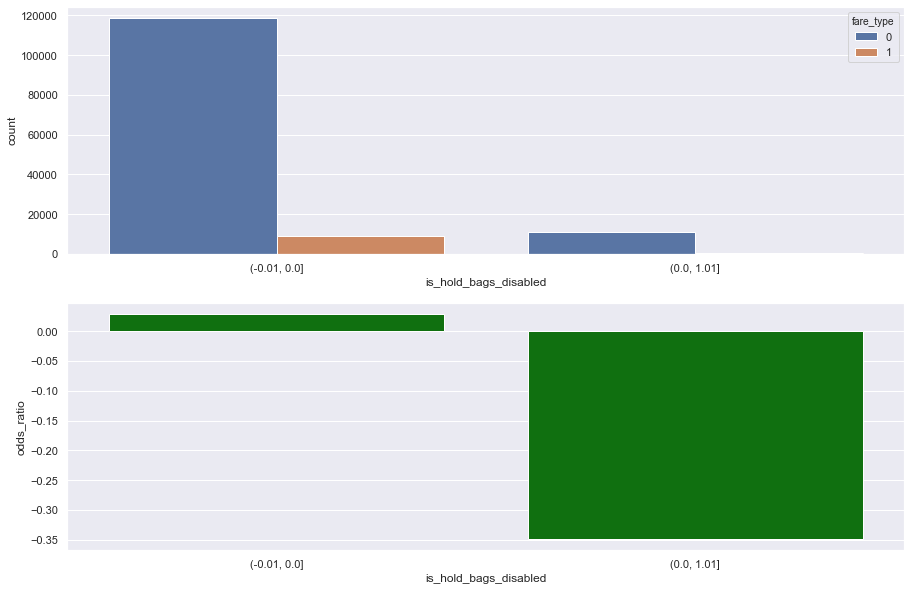

AUC of this variable:
0.51
---------------------------------------------------------
---------------------------------------------------------
search_flight_diff_first
SAME FREQUENCY BINNING:


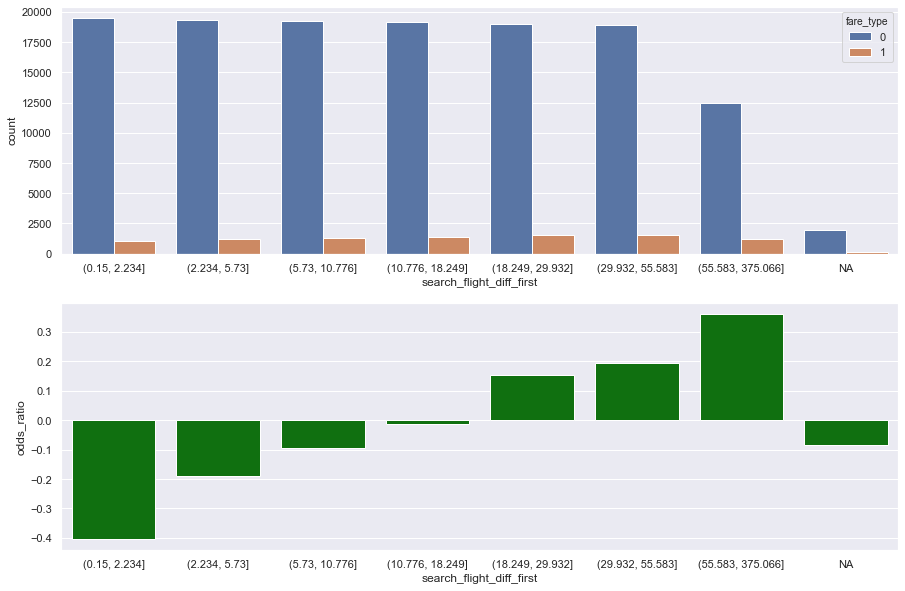

---------------------------------------------------------
---------------------------------------------------------
search_flight_diff_last
SAME FREQUENCY BINNING:


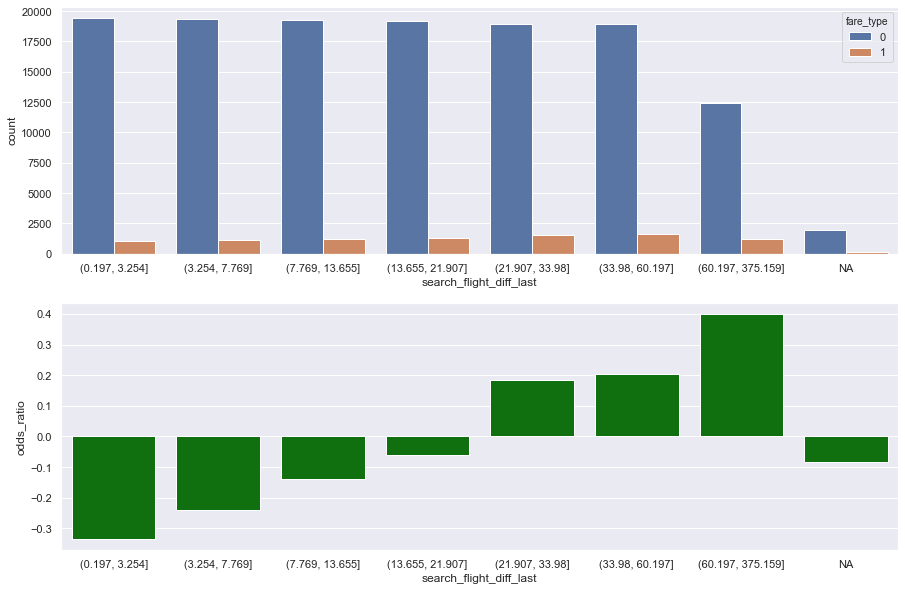

---------------------------------------------------------
---------------------------------------------------------
first_last_flight_diff
SAME FREQUENCY BINNING:


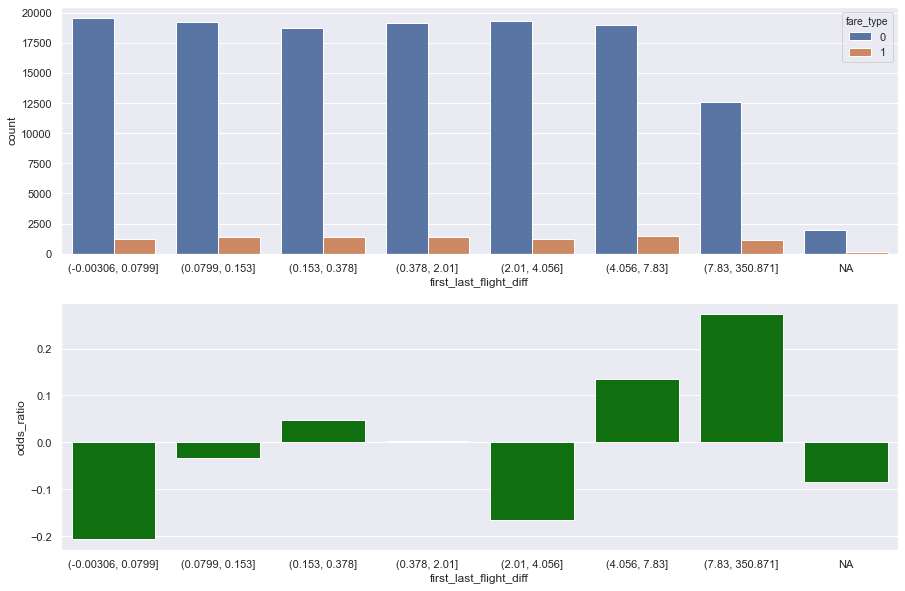

---------------------------------------------------------
---------------------------------------------------------
airline_nunique
SAME FREQUENCY BINNING:


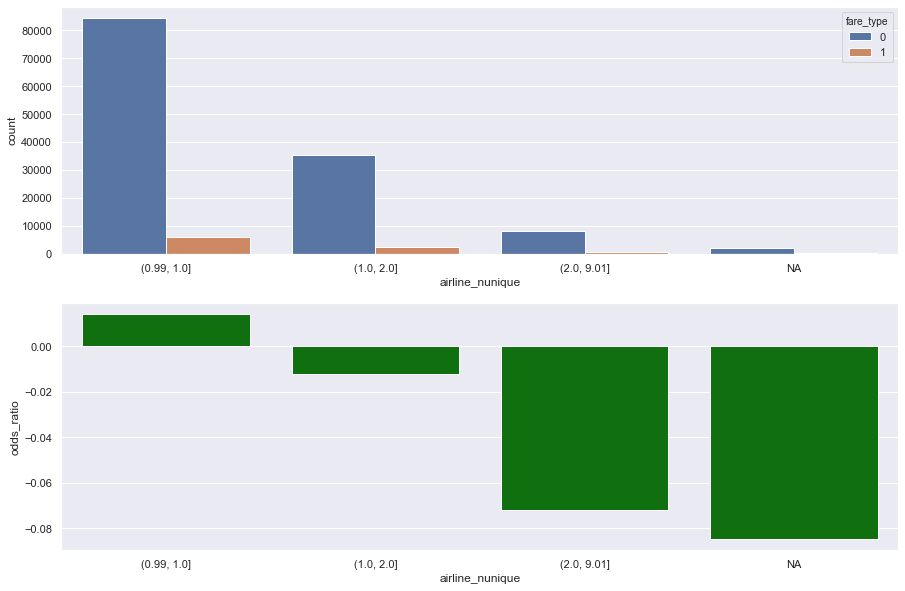

---------------------------------------------------------
---------------------------------------------------------
dayweek_of_first_flight
SAME FREQUENCY BINNING:


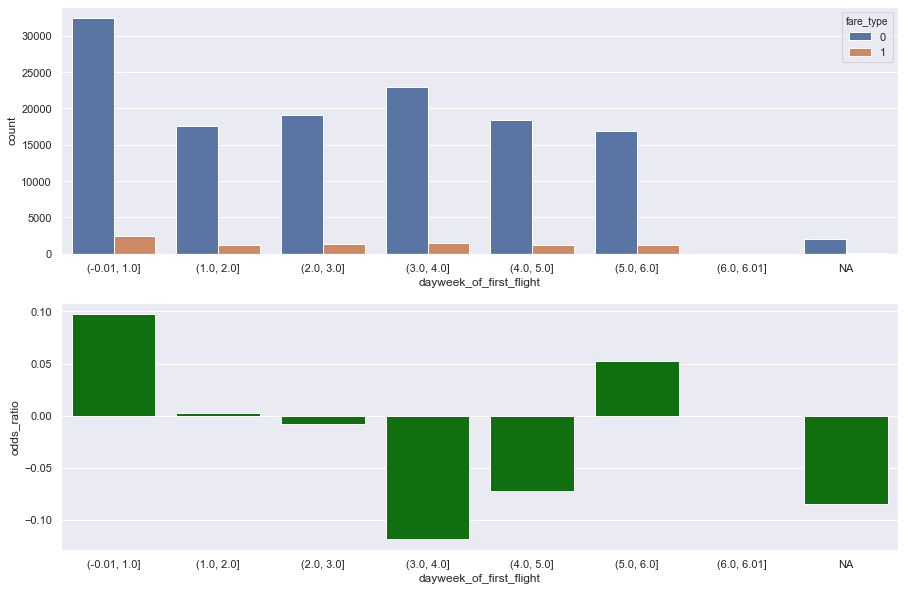

---------------------------------------------------------
---------------------------------------------------------
month_of_first_flight
SAME FREQUENCY BINNING:


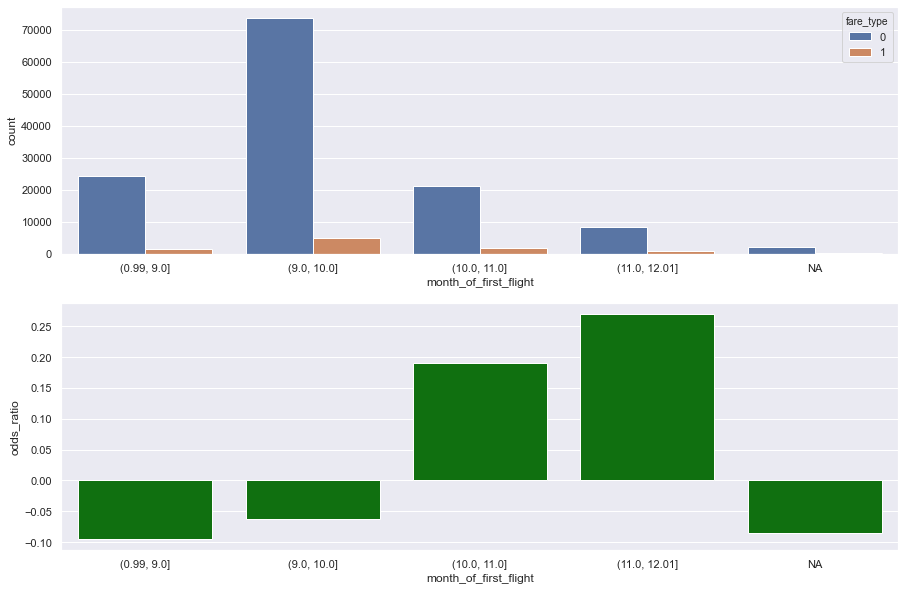

---------------------------------------------------------
---------------------------------------------------------
sector_max
SAME FREQUENCY BINNING:


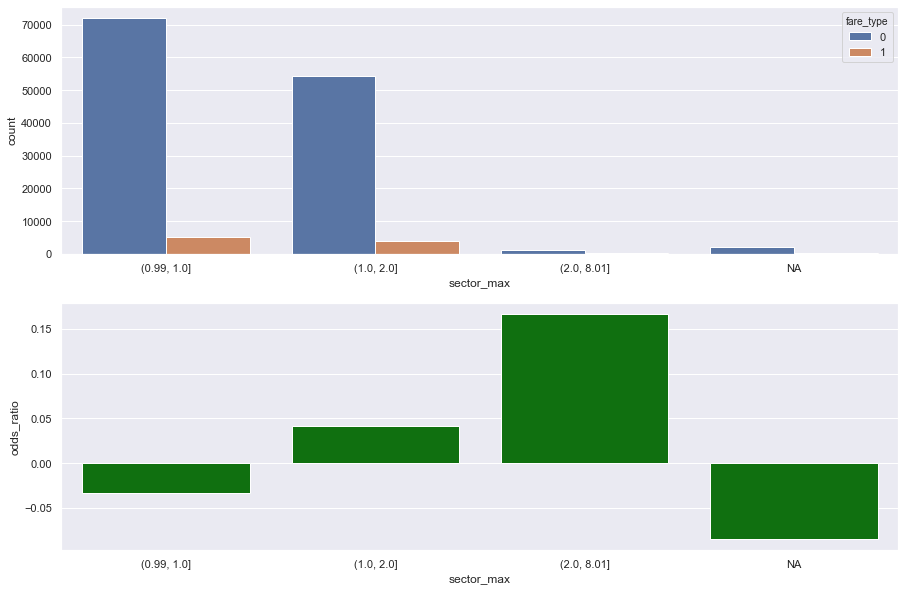

---------------------------------------------------------
---------------------------------------------------------
vehicle_type_nunique
SAME FREQUENCY BINNING:


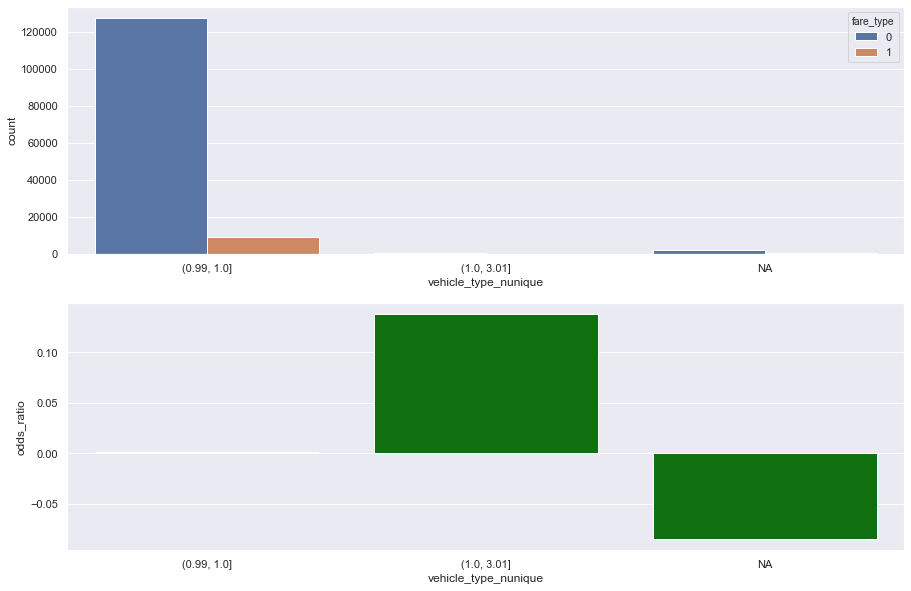

---------------------------------------------------------
---------------------------------------------------------
fare_category_nunique
SAME FREQUENCY BINNING:


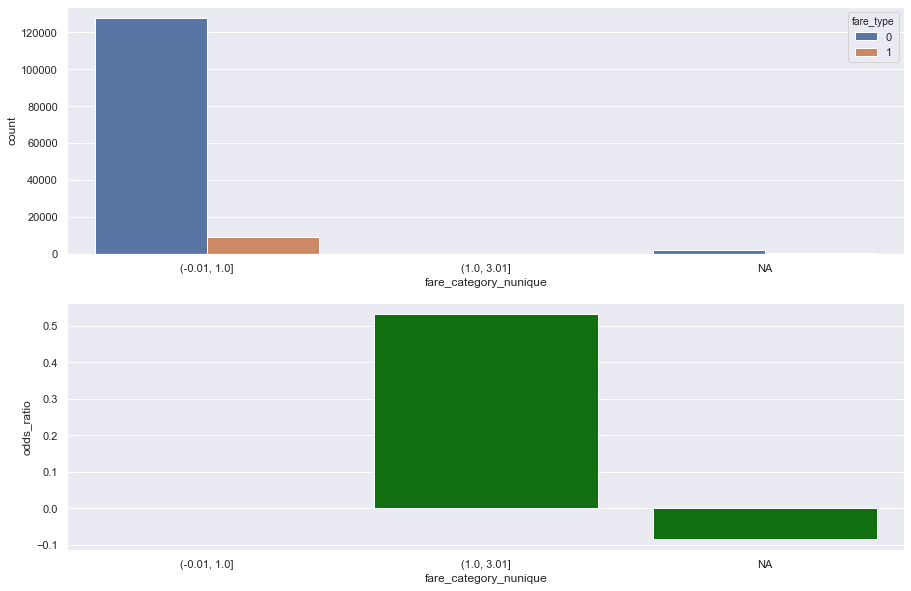

---------------------------------------------------------
---------------------------------------------------------
time_in_air_min
SAME FREQUENCY BINNING:


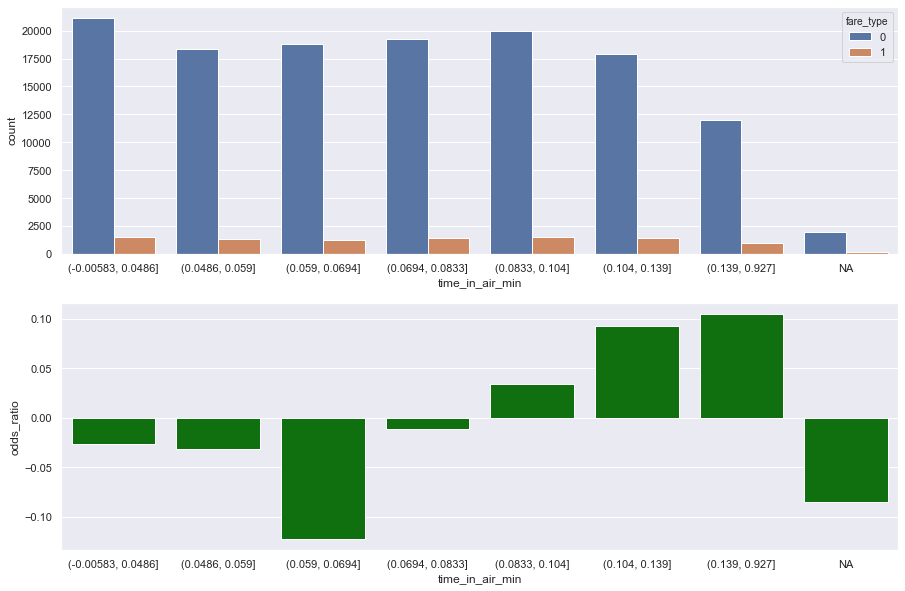

---------------------------------------------------------
---------------------------------------------------------
time_in_air_max
SAME FREQUENCY BINNING:


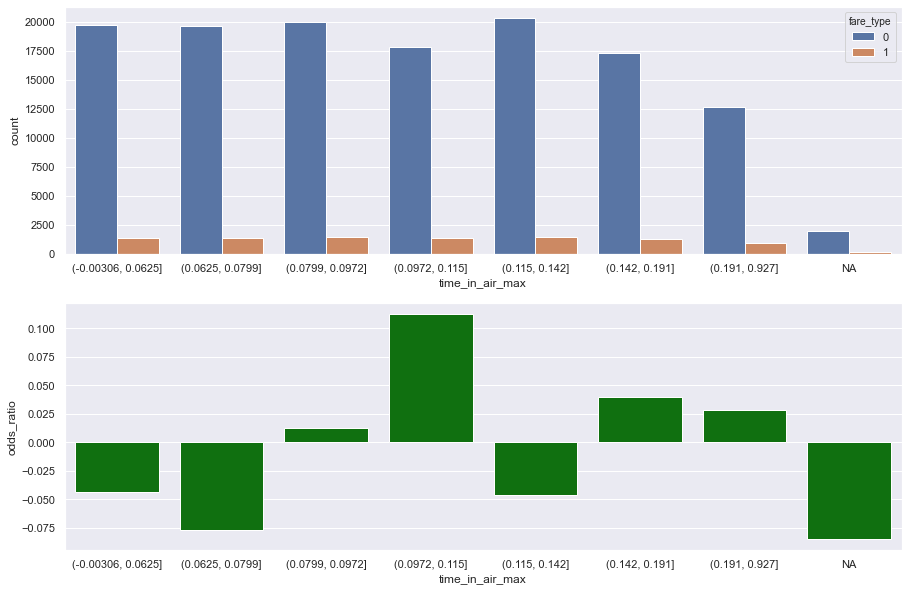

---------------------------------------------------------
---------------------------------------------------------
time_in_air_mean
SAME FREQUENCY BINNING:


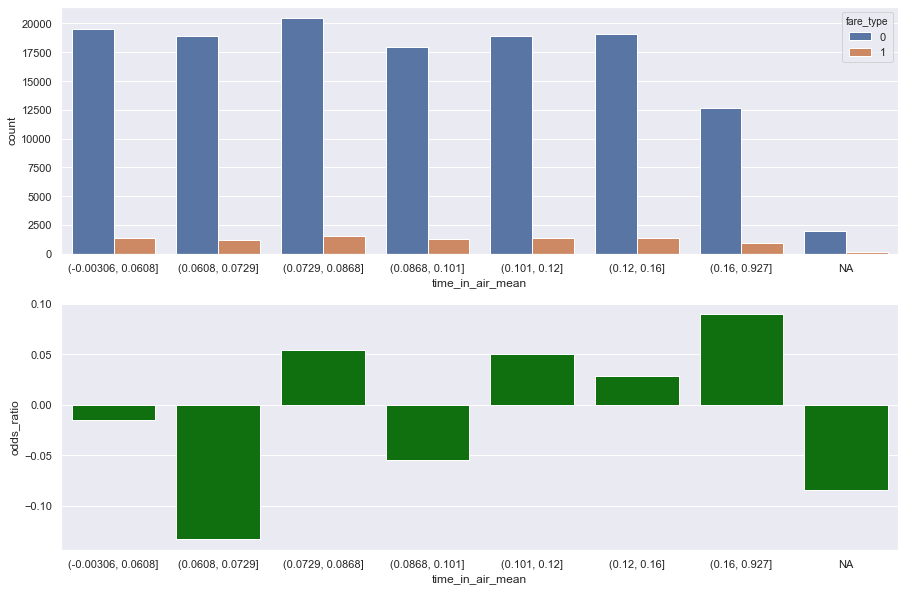

---------------------------------------------------------
---------------------------------------------------------
time_in_air_sum
SAME FREQUENCY BINNING:


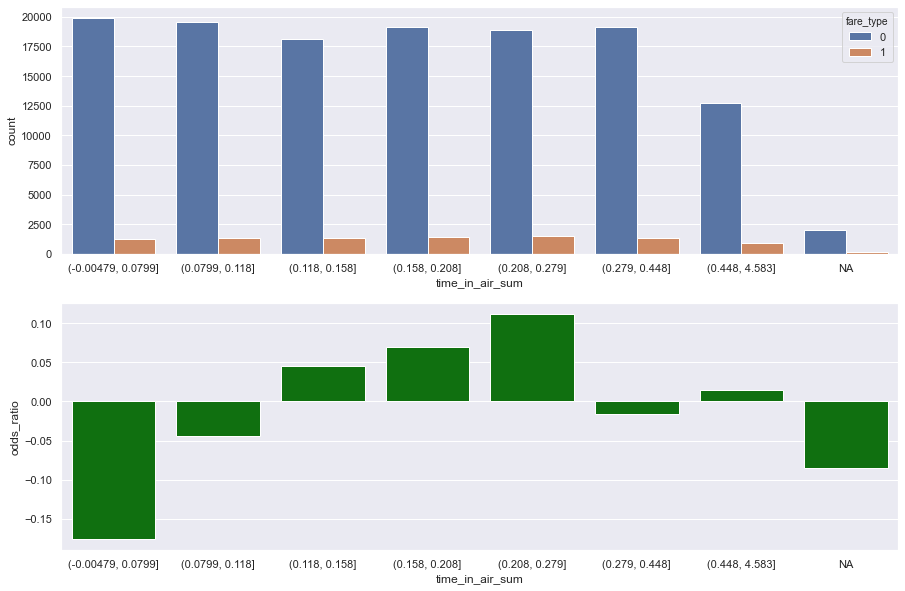

---------------------------------------------------------
---------------------------------------------------------
min_number_of_flights_within_sector
SAME FREQUENCY BINNING:


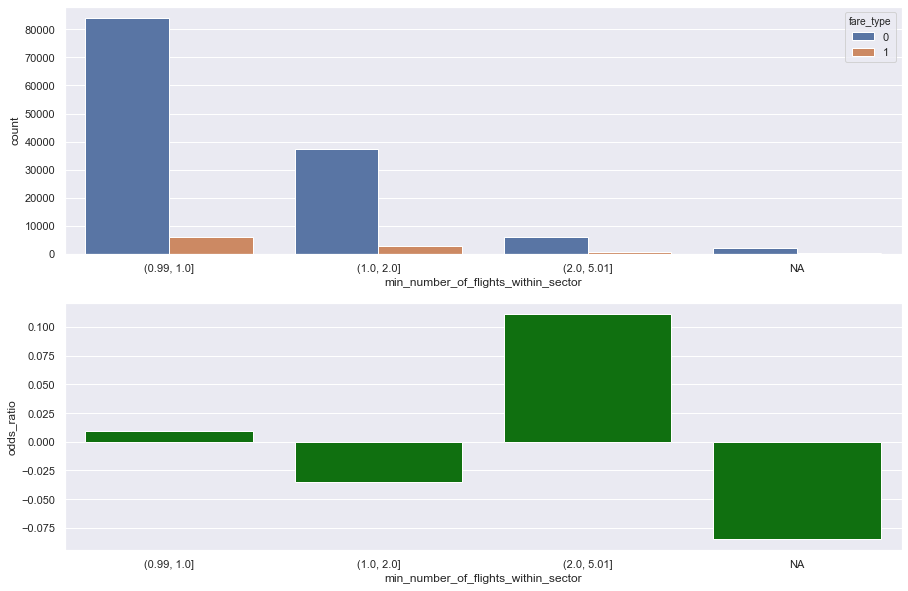

---------------------------------------------------------
---------------------------------------------------------
max_number_of_flights_within_sector
SAME FREQUENCY BINNING:


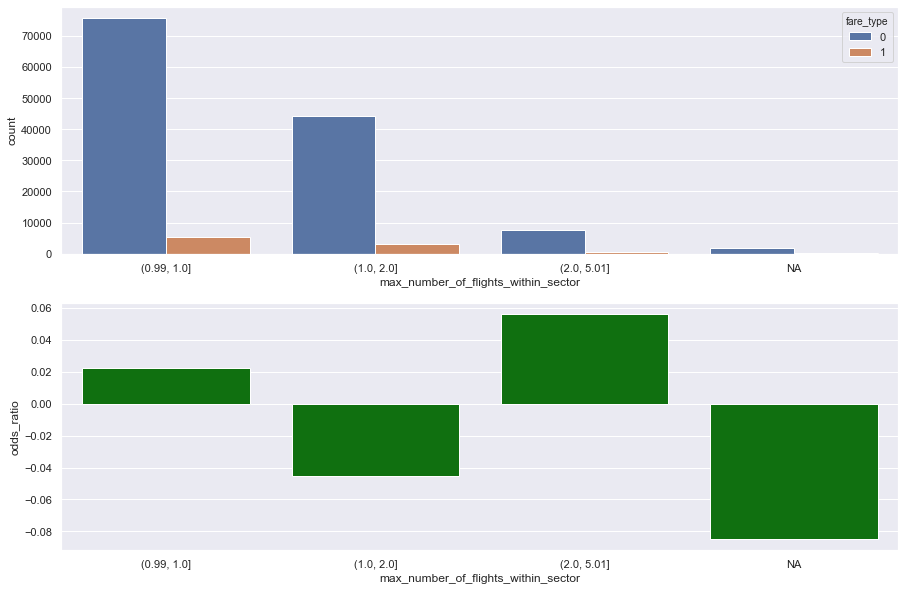

---------------------------------------------------------
---------------------------------------------------------
airline_FR_sum
SAME FREQUENCY BINNING:


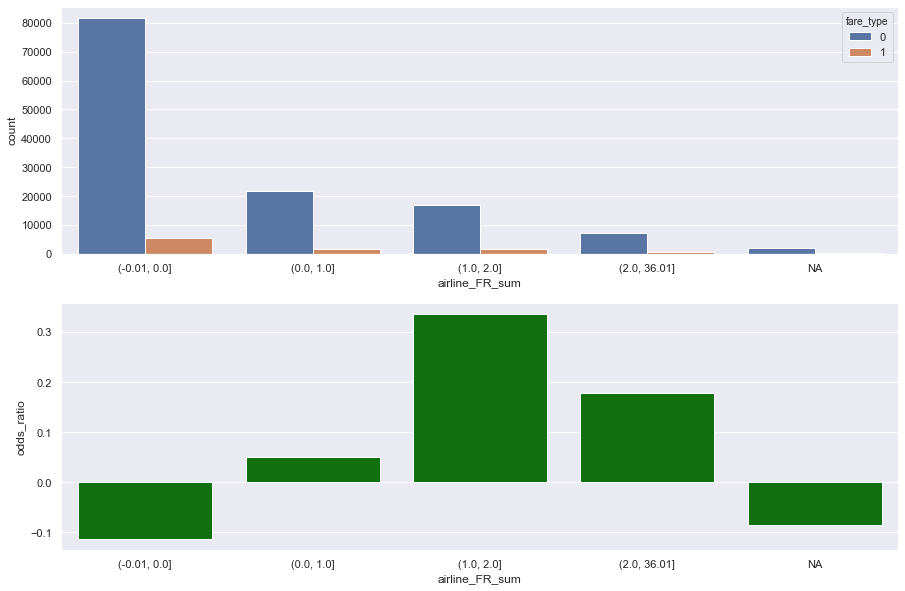

---------------------------------------------------------
---------------------------------------------------------
airline_W6_sum
SAME FREQUENCY BINNING:


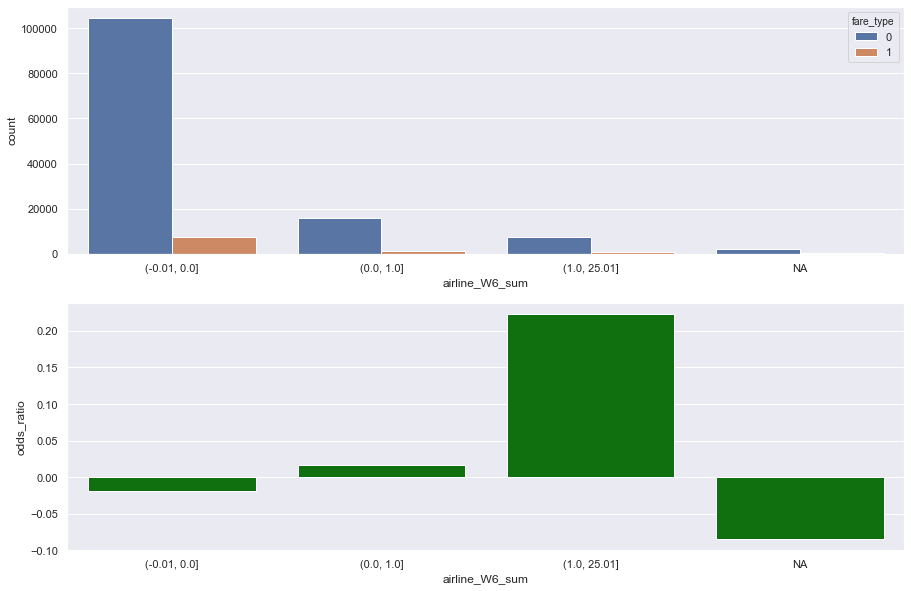

---------------------------------------------------------
---------------------------------------------------------
airline_F9_sum
SAME FREQUENCY BINNING:


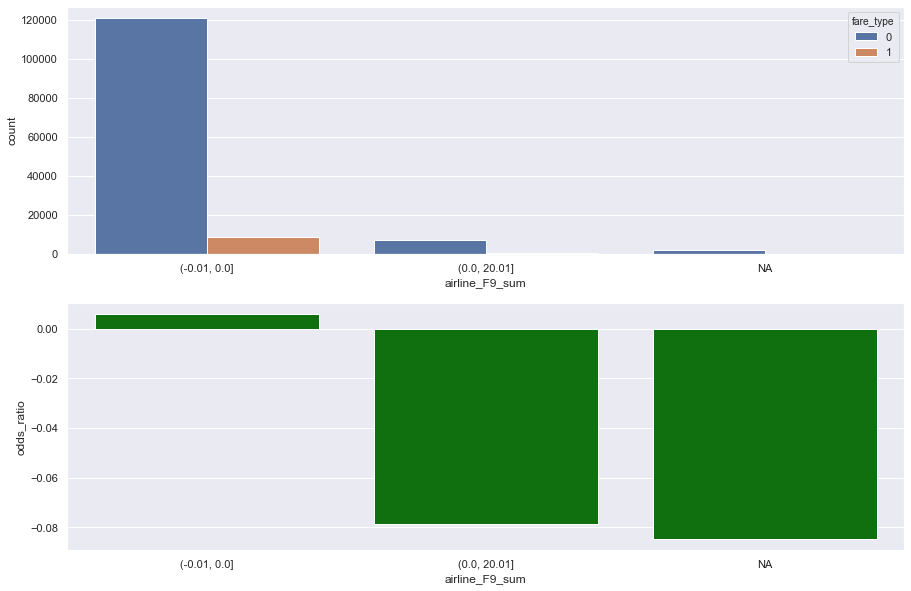

---------------------------------------------------------
---------------------------------------------------------
airline_PC_sum
SAME FREQUENCY BINNING:


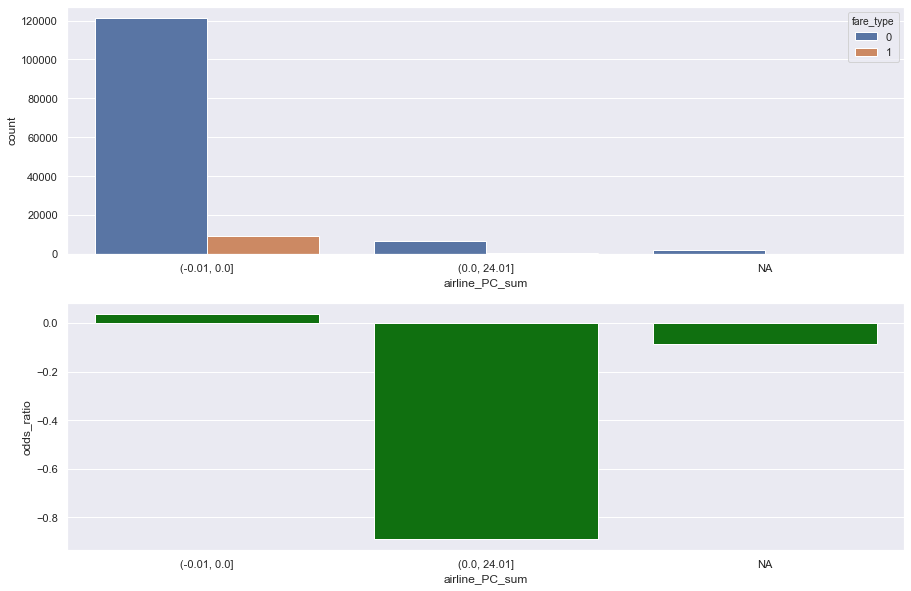

---------------------------------------------------------
---------------------------------------------------------
airline_LA_sum
SAME FREQUENCY BINNING:


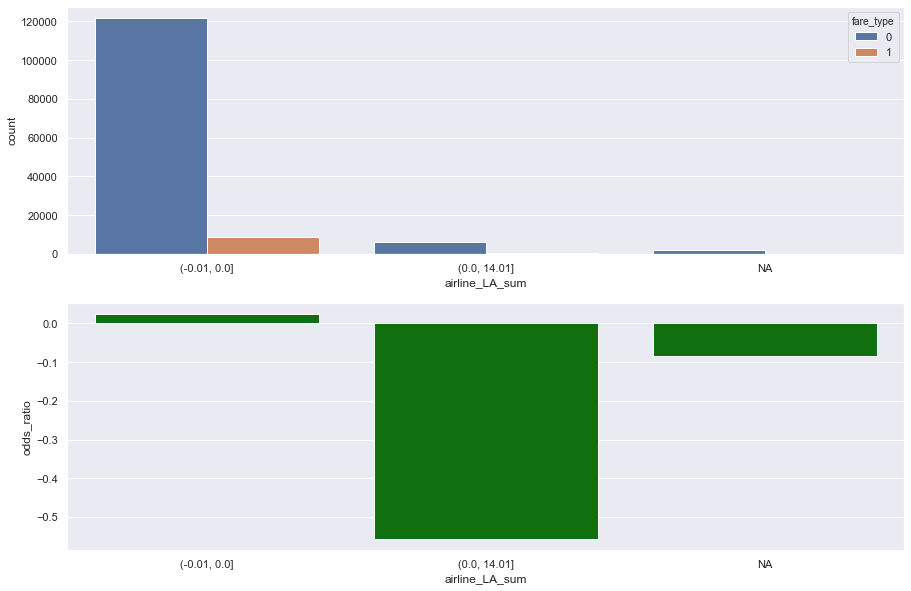

---------------------------------------------------------
---------------------------------------------------------
airline_U2_sum
SAME FREQUENCY BINNING:


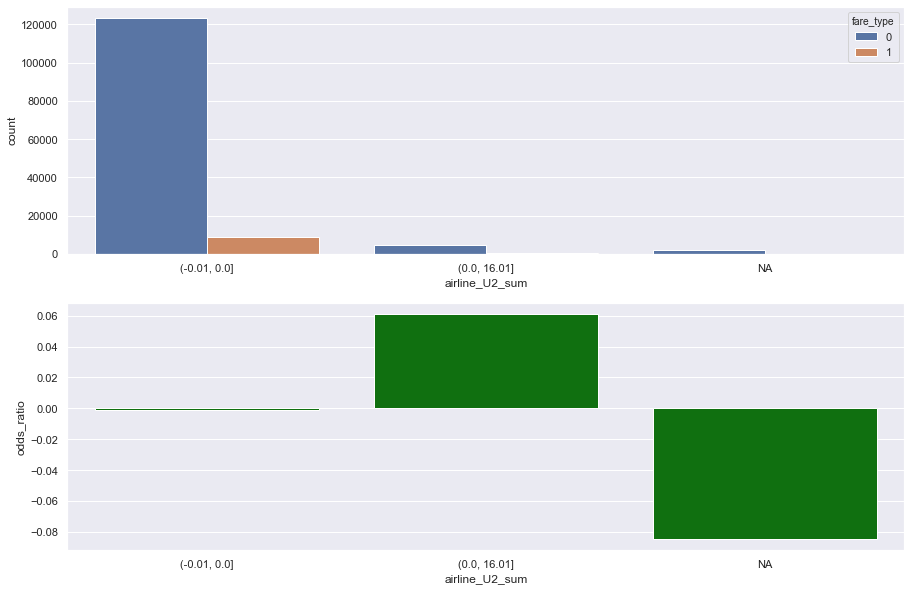

---------------------------------------------------------
---------------------------------------------------------
airline_TK_sum
SAME FREQUENCY BINNING:


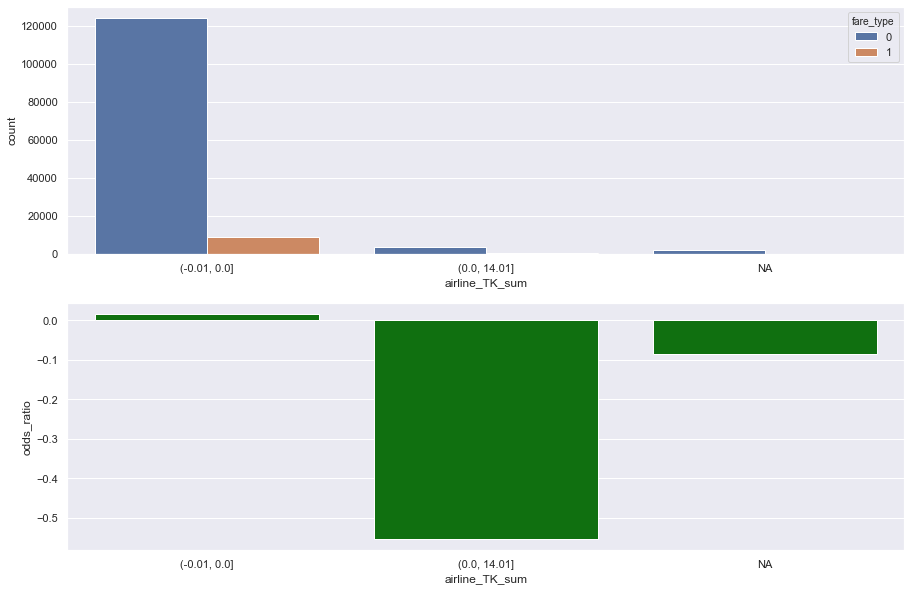

---------------------------------------------------------
---------------------------------------------------------
airline_AY_sum
SAME FREQUENCY BINNING:


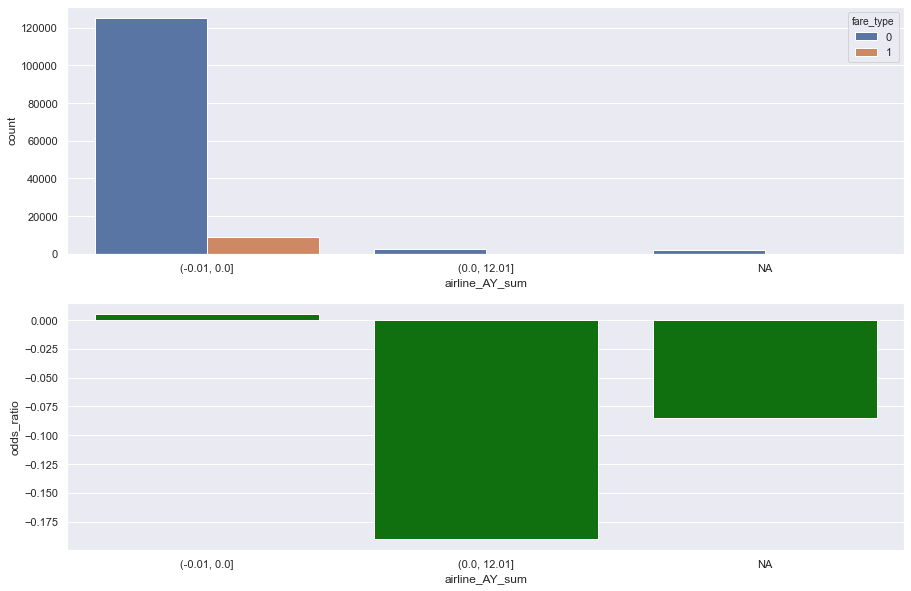

---------------------------------------------------------
---------------------------------------------------------
airline_NK_sum
SAME FREQUENCY BINNING:


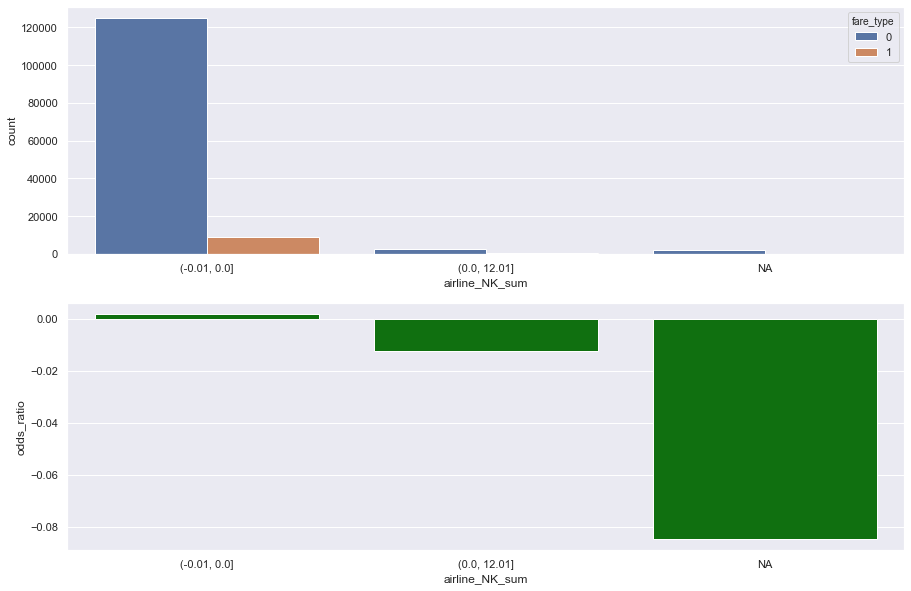

---------------------------------------------------------
---------------------------------------------------------
airline_VY_sum
SAME FREQUENCY BINNING:


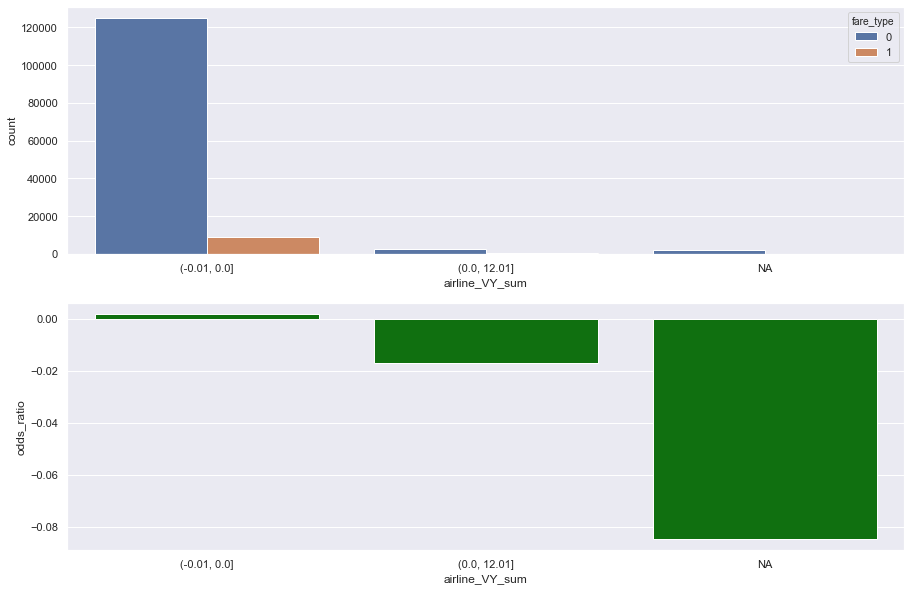

---------------------------------------------------------
---------------------------------------------------------
dayweek_of_search
SAME FREQUENCY BINNING:


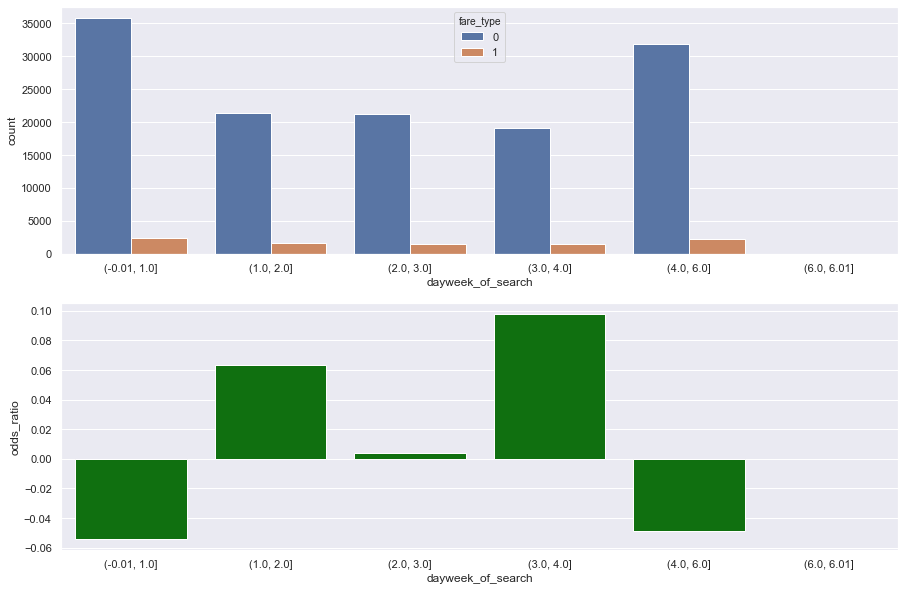

AUC of this variable:
0.501
---------------------------------------------------------
---------------------------------------------------------
month_of_search
SAME FREQUENCY BINNING:


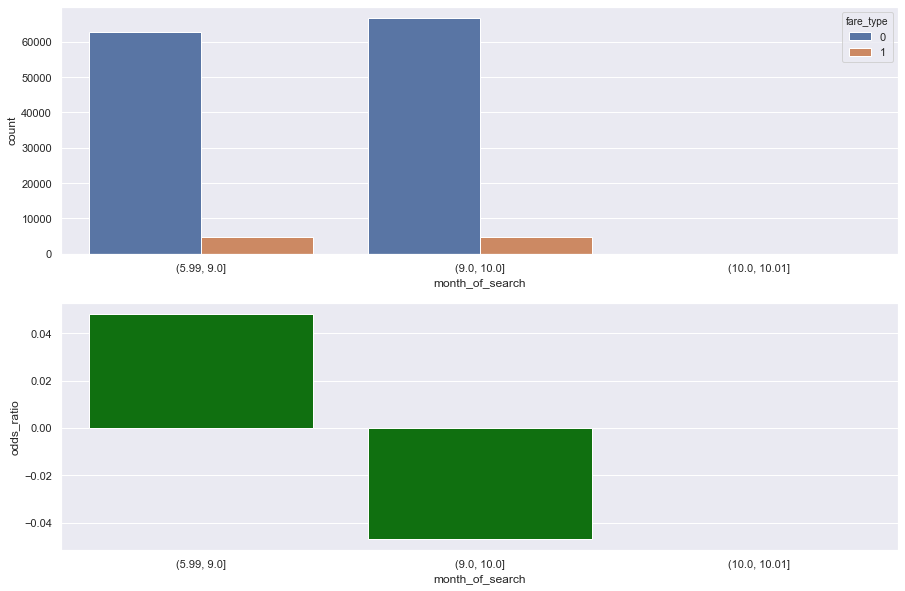

AUC of this variable:
0.509
---------------------------------------------------------
---------------------------------------------------------
hour_of_search
SAME FREQUENCY BINNING:


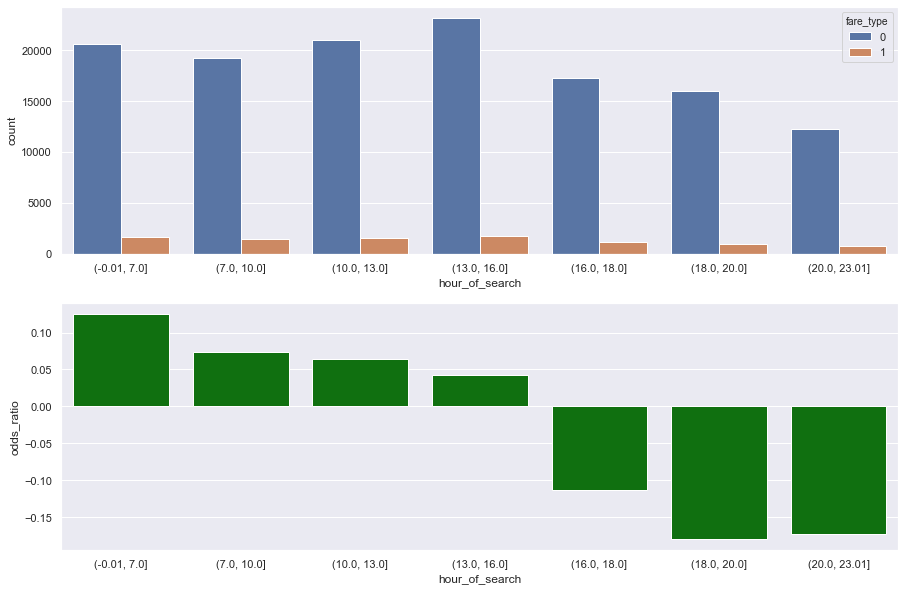

AUC of this variable:
0.522
---------------------------------------------------------
---------------------------------------------------------


In [6]:
for i in numerical_preds:
    print(i)
    
    print('SAME FREQUENCY BINNING:')
    
    borders=[]
    for j in [15,30,45,60,75,90]:
        borders=np.append(borders,np.nanpercentile(train[i],j))
    borders=np.concatenate(([train[i].min()-0.01], borders))
    borders=np.append(borders,train[i].max()+0.01)
    borders=list(dict.fromkeys(borders))
    graph_exploration(pd.cut(train[i],borders),y_train)
    
    try:
        auc=comp_auc(y_train, train[i])
        print('AUC of this variable:')
        if auc > 0.5:
            print(round(auc,3))
        else:
            print(round(1-auc,3))
    except:
        pass
    
    print('---------------------------------------------------------') 
    print('---------------------------------------------------------')

#### Findings:
* Best features seems to be time difference between date of search and date of flight, where flights searched in advance are more likely to be bought with standard or flexi fares.
* Base fare seems to be strong, where more expensive flights are more likely to be bought with target 0.
* Itineraries in December are more likely to be bought with target 1.
* Itineraries with long time of flights (time_in_air_sum) are more likely to be bought with target 1.
* Flights from airline FR (ryanair) are more likely to be bought with target 1.
* Flights bought in late hours (hour_of_search) are more likely to be with target 0.


* Lot of features seems to be completely useless (without predictive power)

## Predictive model - LGBM
LGBM is newer implementation of famous XGBoost algorithm. Trained model is ensemble of many decision trees (usually), where every next decision tree is trained with (pseudo)residuals as a target variable from previous decion trees. Final prediction is then made as average of these decision trees.

LGBM implementation has few advantages over XGBoost - it can handle categorical variables implicitly (you do not need OHE), training of the model is much faster, etc. The results are usually pretty similar.

Fitting of decision trees requires less data preparation than for example logistic regression, where linear relationship between target and variables is demanded. For example I do not have to care about quadratic relationship between age and target, because decision trees can handle it pretty fine. Therefore I do not need to care much about data preprocessing right now (i am not saying, that is never necessary). Next big advantage of decion trees is that in a similar way as nonlinearity implicitely finds interactions between variables. In the linear models you will never find interactions, unless you will create them manually.

Disadvantage of these algorithms is that they are often harder to explain then linear models, where the whole model can be written as equation.

#### Modelling strategy:
Split data to 3 sets - training to train the model, validation to optimize number of trees in the model and testing out of sample set, that is completely untouched during the training phase.
Train set contains 50% of data, valid and test set contains 25% of data

Since we are not handling lack of observation, crossvalidation technique is not needed.

### Discarding of completely useless features

In [7]:
for col in ['passengers', 'airline_nunique', 'sector_max', 'vehicle_type_nunique', 'fare_category_nunique',
           'time_in_air_max', 'time_in_air_mean', 'min_number_of_flights_within_sector',
            'max_number_of_flights_within_sector']:
    numerical_preds.remove(col)

### Specifying of LGBM parameters and retyping categorical columns to category

In [8]:
params={'num_boost_round' : 100000,
        'early_stopping_rounds': 100,
        'learning_rate': 0.01,
        'metric': 'auc',
        'objective': 'binary',
        'seed': 1234, 
        'verbose': 1}

for col in categorical_preds:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')
    valid[col] = valid[col].astype('category')

### Training of LGBM model

In [9]:
preds = numerical_preds + categorical_preds
models = fit_model(train,y_train, valid, y_valid, params, preds)

Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.631143
[400]	valid_0's auc: 0.638347
[600]	valid_0's auc: 0.639693
[800]	valid_0's auc: 0.639932
[1000]	valid_0's auc: 0.640013
Early stopping, best iteration is:
[944]	valid_0's auc: 0.640175
Performance on validation sets:
[0.6409858811499793]
Mean:
0.6409858811499793


### Plotting ROC AUC curve for all sets

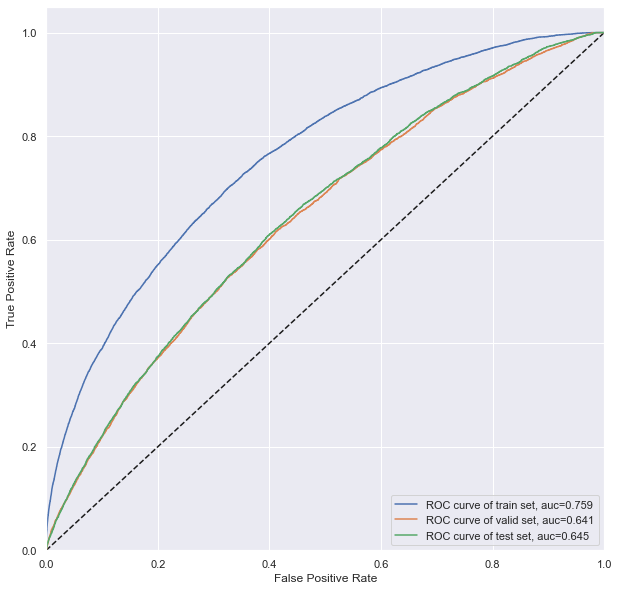

In [10]:
prepare_roc()


fpr, tpr, _ = roc_curve(y_train, predict(models, train, preds))
auc=roc_auc_score(y_train, predict(models, train, preds))
plt.plot(fpr, tpr, label = 'ROC curve of train set, auc={}'.format(round(auc,3)))
plt.legend(loc="lower right")
    
fpr, tpr, _ = roc_curve(y_valid, predict(models, valid, preds))
auc=roc_auc_score(y_valid, predict(models, valid, preds))
plt.plot(fpr, tpr, label = 'ROC curve of valid set, auc={}'.format(round(auc,3)))
plt.legend(loc="lower right")
    
fpr, tpr, _ = roc_curve(y_test, predict(models, test, preds))
auc=roc_auc_score(y_test, predict(models, test, preds))
plt.plot(fpr, tpr, label = 'ROC curve of test set, auc={}'.format(round(auc,3)))
plt.legend(loc="lower right")
    
plt.show()

The fact, that model is overfitted is pretty much common in training of deep xgboost/lgbm/nn models and we should not care about performance on training set and focus only validation and out of sample testing set. 

Testing and validation performances is about AUC = 0.645, which is not incredebly good, but on the other hand much better than random ranking (AUC = 0.5). Features that were created have only low discriminative power to distinguish between fare types. 

### Importance of the features 

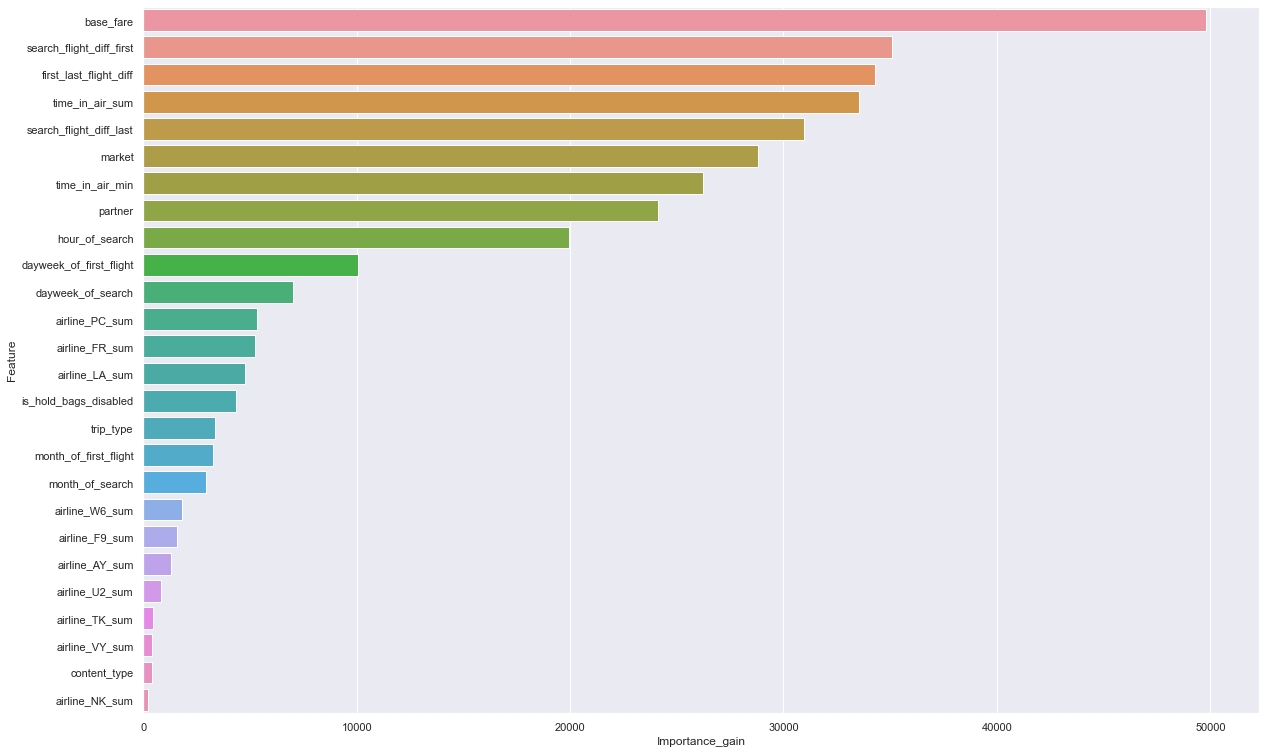

In [11]:
plot_importance(models, 'Importance_gain', preds ,ret=False, show=True, n_predictors = len(preds))

As was expected from EDA, base fare, seafch_flight_diff, time_in_air_sum and market are most important features.

### Importance of the features based on SHAP values

Shap values is superpowerful method that gives us contribution to the predicted outcome of each variable for every single observation. Therefore it brings local interpretability to every prediction and makes this model less 'black-box'.

Variables are sorted according their mean absolute impact on the prediction. And the SHAP value on x-axis means difference contribution to the prediction - average prediction in logits.

SHAP dependence plot shows real relation between variable and prediction and with this tool one can check that the variable in the model. behaves similarly that is expected for example from EDA.

Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.624135
[400]	valid_0's auc: 0.630275
[600]	valid_0's auc: 0.632256
[800]	valid_0's auc: 0.633219
[1000]	valid_0's auc: 0.633961
Early stopping, best iteration is:
[1096]	valid_0's auc: 0.634195


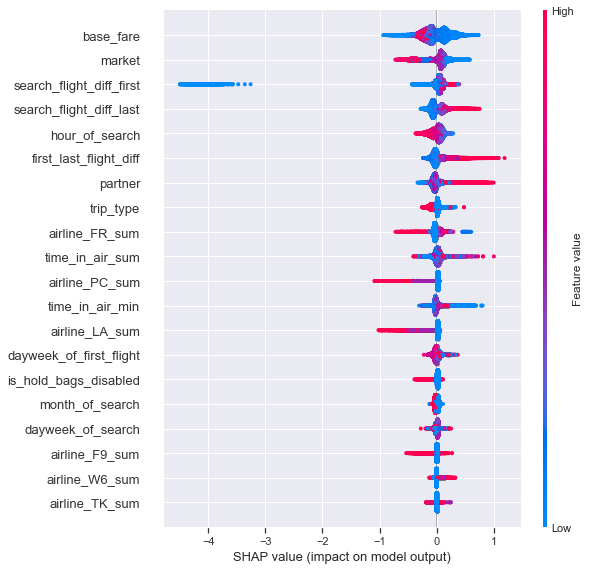

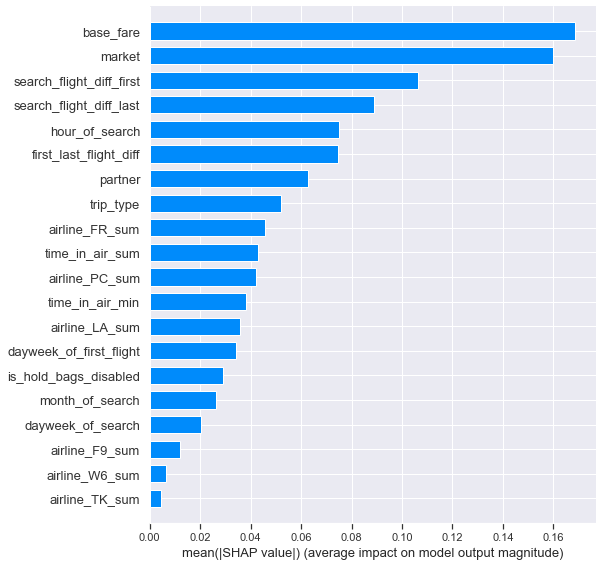

In [13]:
te_shap, shap_values ,explainer = print_shap_values(preds, categorical_preds, train, y_train, valid, y_valid, params)


base_fare


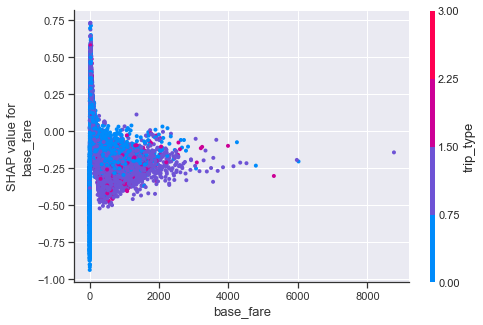

is_hold_bags_disabled


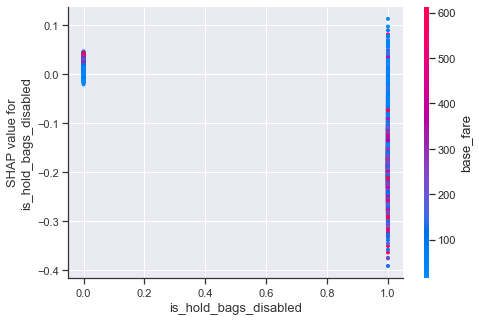

search_flight_diff_first


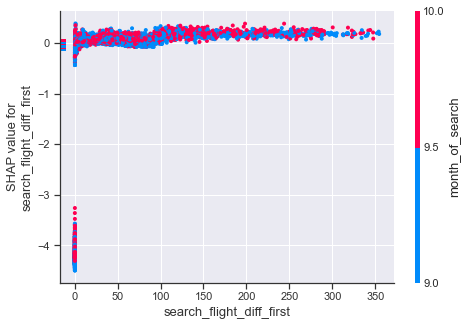

search_flight_diff_last


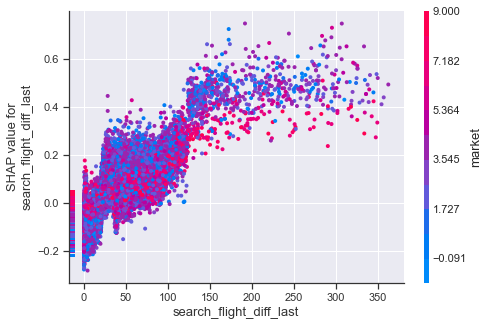

first_last_flight_diff


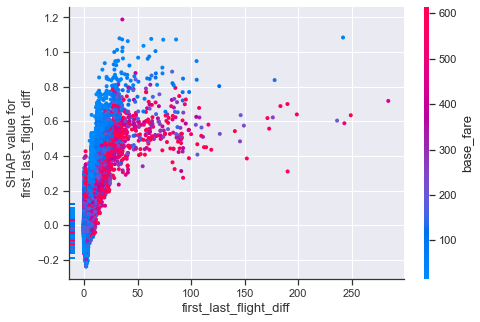

dayweek_of_first_flight


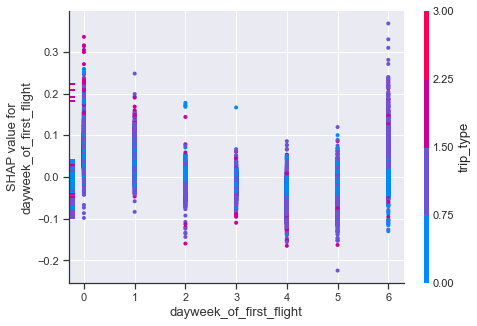

month_of_first_flight


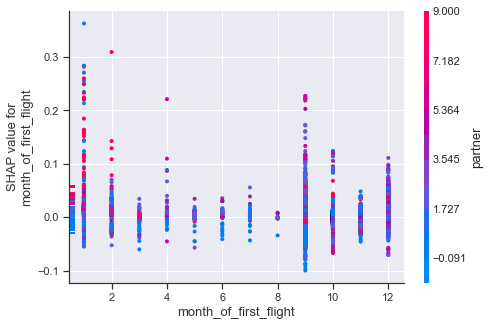

time_in_air_min


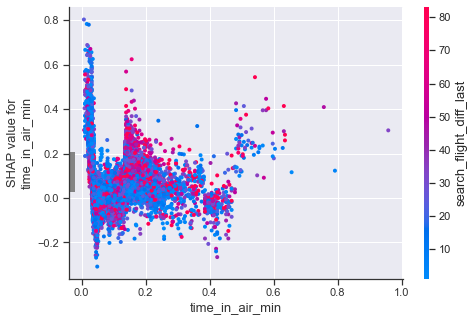

time_in_air_sum


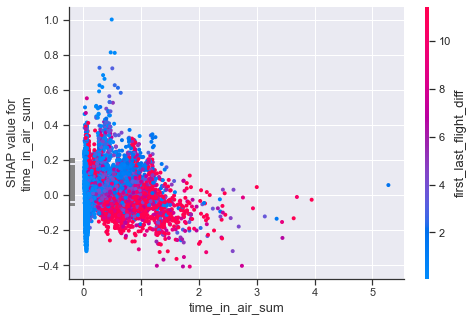

airline_FR_sum


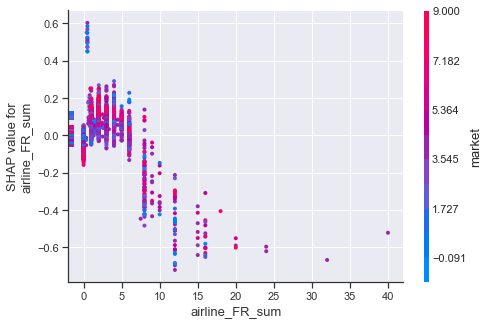

airline_W6_sum


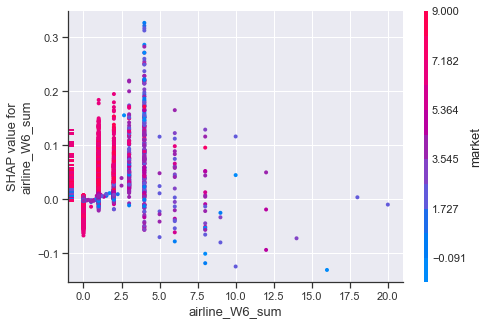

airline_F9_sum


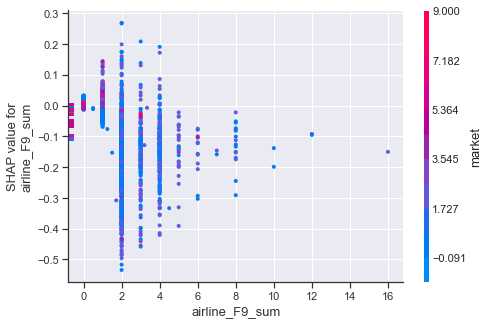

airline_PC_sum


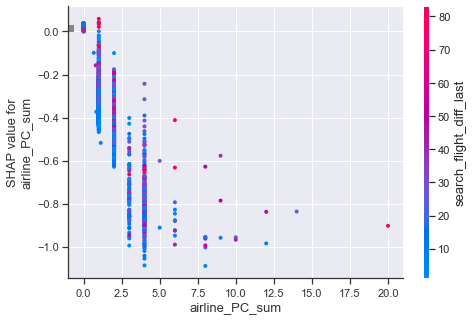

airline_LA_sum


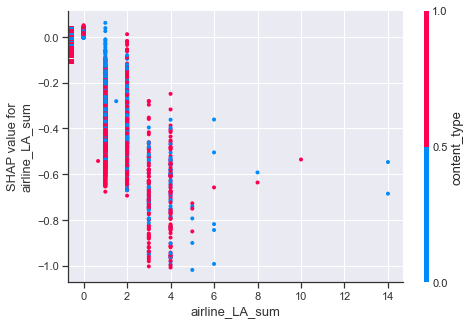

airline_U2_sum


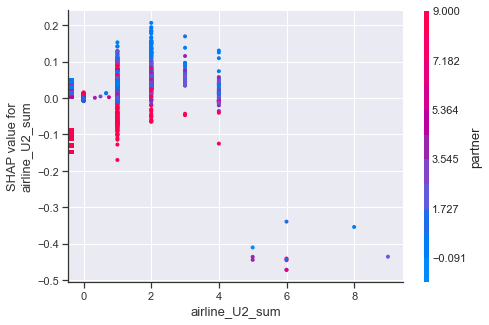

airline_TK_sum


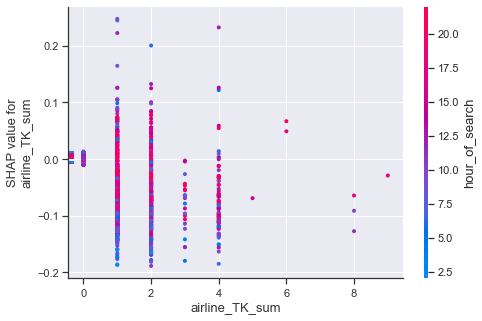

airline_AY_sum


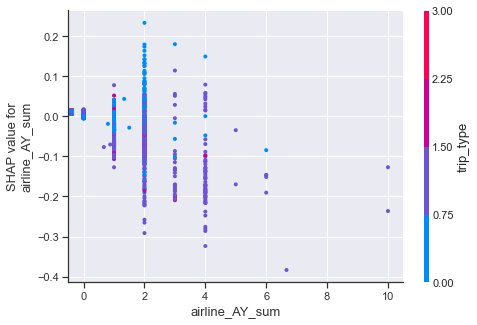

airline_NK_sum


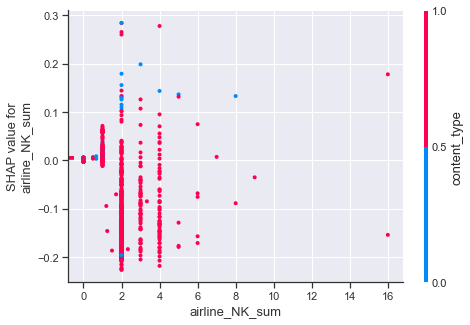

airline_VY_sum


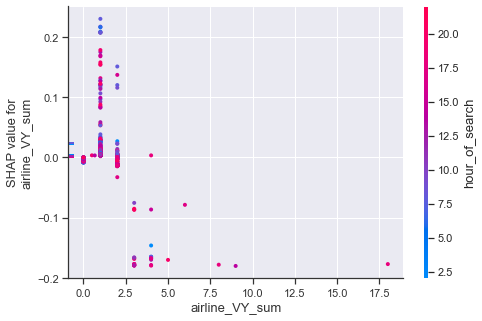

dayweek_of_search


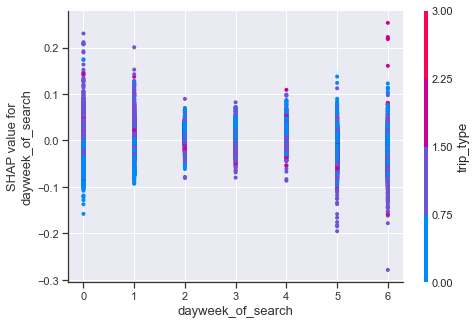

month_of_search


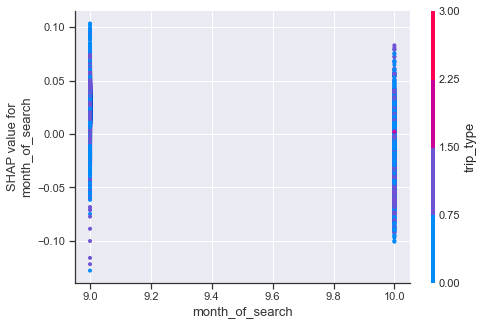

hour_of_search


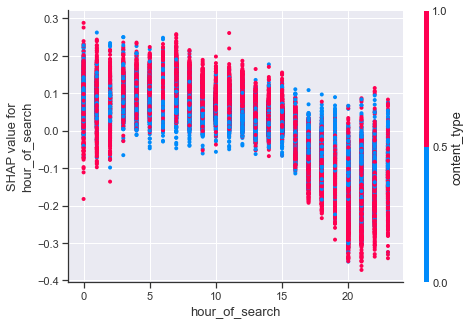

content_type


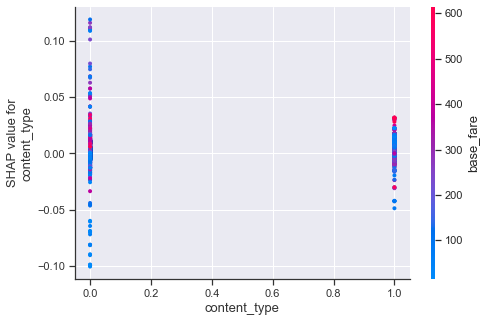

partner


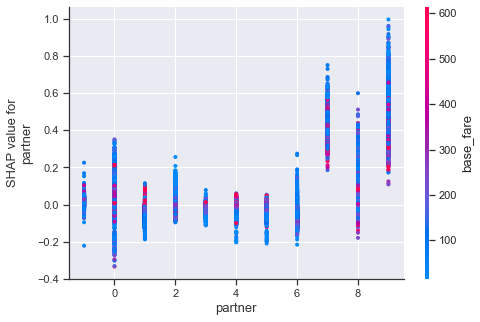

trip_type


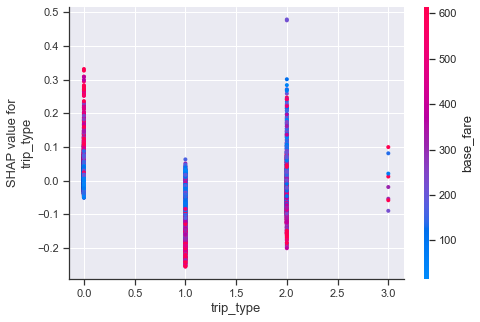

market


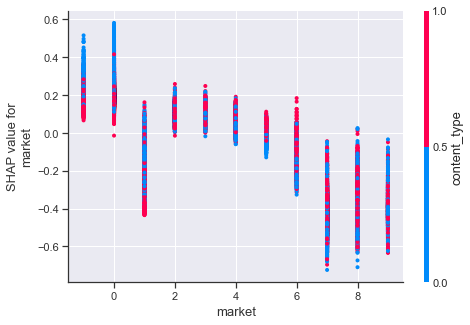

In [15]:
for i in preds:
    print(i)
    shap_dependence_plot(te_shap, shap_values, i, y=None)

From SHAP values diagnostics we can see that there are some flight, that are book closely before the flight and these flights are 
almost never booked with target 1.

# Conclusion

LGBM model was trained and evaluated on KIWI's dataset about whether the client will or will not buy premium fare. Model was trained with couple of handcrafted features from provided data about flights and evaluated with ROC AUC metric of 0.645 on validation and testing sets. Afterwards variable's importances was evaluated with standard method and SHAP values method.

As the biggest area for improvement I can see adding some new features that would correlate with target according to the domain knowledge of the area, which was missing in my case.